In [1]:
import numpy as np
import tensorflow as tf
import gym
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
env = gym.make('CartPole-v0')

[2017-11-12 17:37:28,123] Making new env: CartPole-v0


## space exploration

In [3]:
env.reset()
env.step(1)

(array([ 0.02539857,  0.23630125, -0.01768621, -0.30736519]), 1.0, False, {})

In [4]:
actions = []
for _ in range(10000):
    actions.append(env.action_space.sample())
    
print('max action =', max(actions))
print('min action =', min(actions))

max action = 1
min action = 0


Reward for this episode was: 21.0
Reward for this episode was: 19.0
Reward for this episode was: 21.0
Reward for this episode was: 25.0
Reward for this episode was: 33.0
Reward for this episode was: 84.0
Reward for this episode was: 13.0
Reward for this episode was: 26.0
Reward for this episode was: 10.0
Reward for this episode was: 13.0


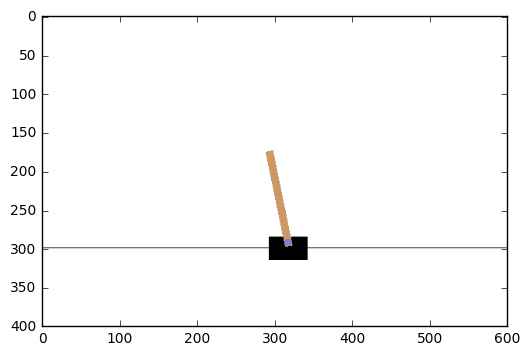

In [7]:
env.reset()
random_episodes = 0
reward_sum = 0
while random_episodes < 10:
    plt.imshow(env.render(mode='rgb_array'))
    observation, reward, done, _ = env.step(np.random.randint(0,2))
    reward_sum += reward
    if done:
        random_episodes += 1
        print("Reward for this episode was:",reward_sum)
        reward_sum = 0
        env.reset()

In [8]:
env.reset()

array([ 0.01470682, -0.01325375, -0.03012025,  0.01912441])

## build agent

In [56]:
state_size = 4
action_size = 2
hidden_size = 8

state_input = tf.placeholder(shape=[None, state_size], dtype=tf.float32)
w1 = tf.Variable(tf.random_normal([state_size, hidden_size], stddev=1))
w2 = tf.Variable(tf.random_normal([hidden_size, 2], stddev=1))

# network
input_layer = tf.nn.relu(tf.matmul(state_input, w1))
output_layer = tf.matmul(input_layer, w2)
probs = tf.nn.sigmoid(output_layer)

## loss fn and optimizer

In [57]:
reward_holder = tf.placeholder(shape=[None], dtype=tf.float32)
action_holder = tf.placeholder(shape=[None], dtype=tf.int32)

loss = -(tf.log(probs)*reward_holder)
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
update = optimizer.minimize(loss)

## reward time delay discounting

In [58]:
def discount_rewards(r):
    discounted_r = np.zeros_like(r)
    running_add = 0
    for t in reversed(range(0, r.size)):
        running_add = running_add * 0.99 + r[t]
        discounted_r[t] = running_add
    return discounted_r

## Run session

In [74]:
episode_number = 1

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    obs = env.reset().reshape(1,4)
    
    ep_hist = []
    
    while episode_number <= 2:
    
        actions = sess.run(probs, feed_dict={state_input: obs})
        a = np.random.choice(actions[0], p=actions[0])
        action = np.argmax(actions == a)
        
        s1,r,done,_ = env.step(action)
        ep_hist.append([s,a,r,s1])
        s = s1
        running_reward += r
        
        if done:
            ep_history = np.array(ep_history)
            ep_history[:,2] = discount_rewards(ep_history[:,2])
            
            feed_dict={reward_holder:ep_history[:,2],
                    action_holder:ep_history[:,1], state_input:np.vstack(ep_history[:,0])}
            
            grads = sess.run(myAgent.gradients, feed_dict=feed_dict)
            
        episode_number += 1

ValueError: probabilities do not sum to 1

In [75]:
actions

array([[ 0.47917876,  0.48068252]], dtype=float32)

In [76]:
actions[0, 0] + actions[0,1]

0.95986128